In [103]:
suppressMessages({
    library(Gviz)
    library(GenomicRanges)
    library(GenomicFeatures)
    library(rtracklayer)
    library(repr)
    library(dplyr)
    library(AnnotationHub)
})
options(ucscChromosomeNames=FALSE)
source("/home/wangrr/Analysis/epiRNA/src/epiRNA/Rscript/gviz_utils.R")
setwd("/data/wangrr/Analysis/epiRNA/workdir2/benchmark")

In [4]:
ref_dir <- "/data/wangrr/Analysis/epiRNA/Dataset/Reference"
data_dir <- "/data/wangrr/Analysis/epiRNA/Dataset/processed/4-coverage/m6A"
peak_dir <- "/data/wangrr/Analysis/epiRNA/Dataset/processed/5-peakcall/m6A"
human_gtf_file <- file.path(ref_dir, "Homo_sapiens.GRCh38.84.gtf")
mouse_gtf_file <- file.path(ref_dir, "Mus_musculus.GRCm38.84.gtf")

human_gtf <- load_gtf(human_gtf_file)
mouse_gtf <- load_gtf(mouse_gtf_file)

In [82]:
unique(human_gtf$type)

[1] gene            transcript      exon            CDS            
[5] start_codon     stop_codon      five_prime_utr  three_prime_utr
[9] Selenocysteine 
9 Levels: gene transcript exon CDS start_codon stop_codon ... Selenocysteine

In [108]:
chrom <- "8"
start <- 63157901 + 1
end <- start + 65536
genome <- "hg38"

genes <- extract_genes_from_gtf(gtf=human_gtf, chrom=chrom, start=start, end=end)
geneModels <- get_geneModels(genes, protein_coding_only = TRUE)
grtrack <- get_grtrack(geneModels, chrom=chrom, start=start, end=end, collapseTranscripts="longest", shape="arrow")

  Found 141 genes in region


In [109]:
min(geneModels$start) - max(geneModels$end)

[1] -44233

In [110]:
sample <- "Hela-1"
peak_file <- file.path(peak_dir, sample, paste0(sample, "_peaks.narrowPeak"))
extraCols_narrowPeak <- c(singnalValue = "numeric", pValue = "numeric",
                          qValue = "numeric", peak = "integer")
peak_data <- rtracklayer::import(peak_file, format = "BED", extraCols = extraCols_narrowPeak)

peak_track <- AnnotationTrack(
    peak_data, 
    name="Peak", 
    chrom=chrom, 
    start=start, 
    end=end,
    background.panel="white",
    background.title="#588423"
)

In [63]:
gene <- "YTHDF3"
pred_dir <- "./predicted_bigwig"

input_bw <- file.path(data_dir, "Input", paste0(sample, ".bigwig"))
ip_bw <- file.path(data_dir, "IP", paste0(sample, ".bigwig"))
pred_bw <- file.path(pred_dir, paste0(sample, "_", gene, "_", "complete.bigwig"))

bw_file_list <- c(input_bw, ip_bw, pred_bw)
track_colors <- c("#303232", "#4a3eb0", "#b92b27")
log_flags <- c(TRUE, TRUE, FALSE)
track_titles <- c("RNA-seq \nobserved", "m6A-seq \nobserved", "m6A-seq \npredicted")

bwtracks <- c()
i = 1
for (bwfile in bw_file_list) {
    track <- get_bwtrack(
        bwfile, chrom, start, end, track_color=track_colors[i],
        log_transform=log_flags[i], panel_title=track_titles[i],
        ylim=c(0,6),
        yTicksAt=c(0,3,6)
    )
    bwtracks <- c(bwtracks, track)
    i = i + 1
}

In [64]:
axis_track <- GenomeAxisTrack(
    name = "",
    add53 = TRUE,
    add35 = TRUE,
    labelPos = "alternating",
    cex = 1
)

In [112]:
full_tracks <- c(bwtracks, peak_track, grtrack, axis_track)

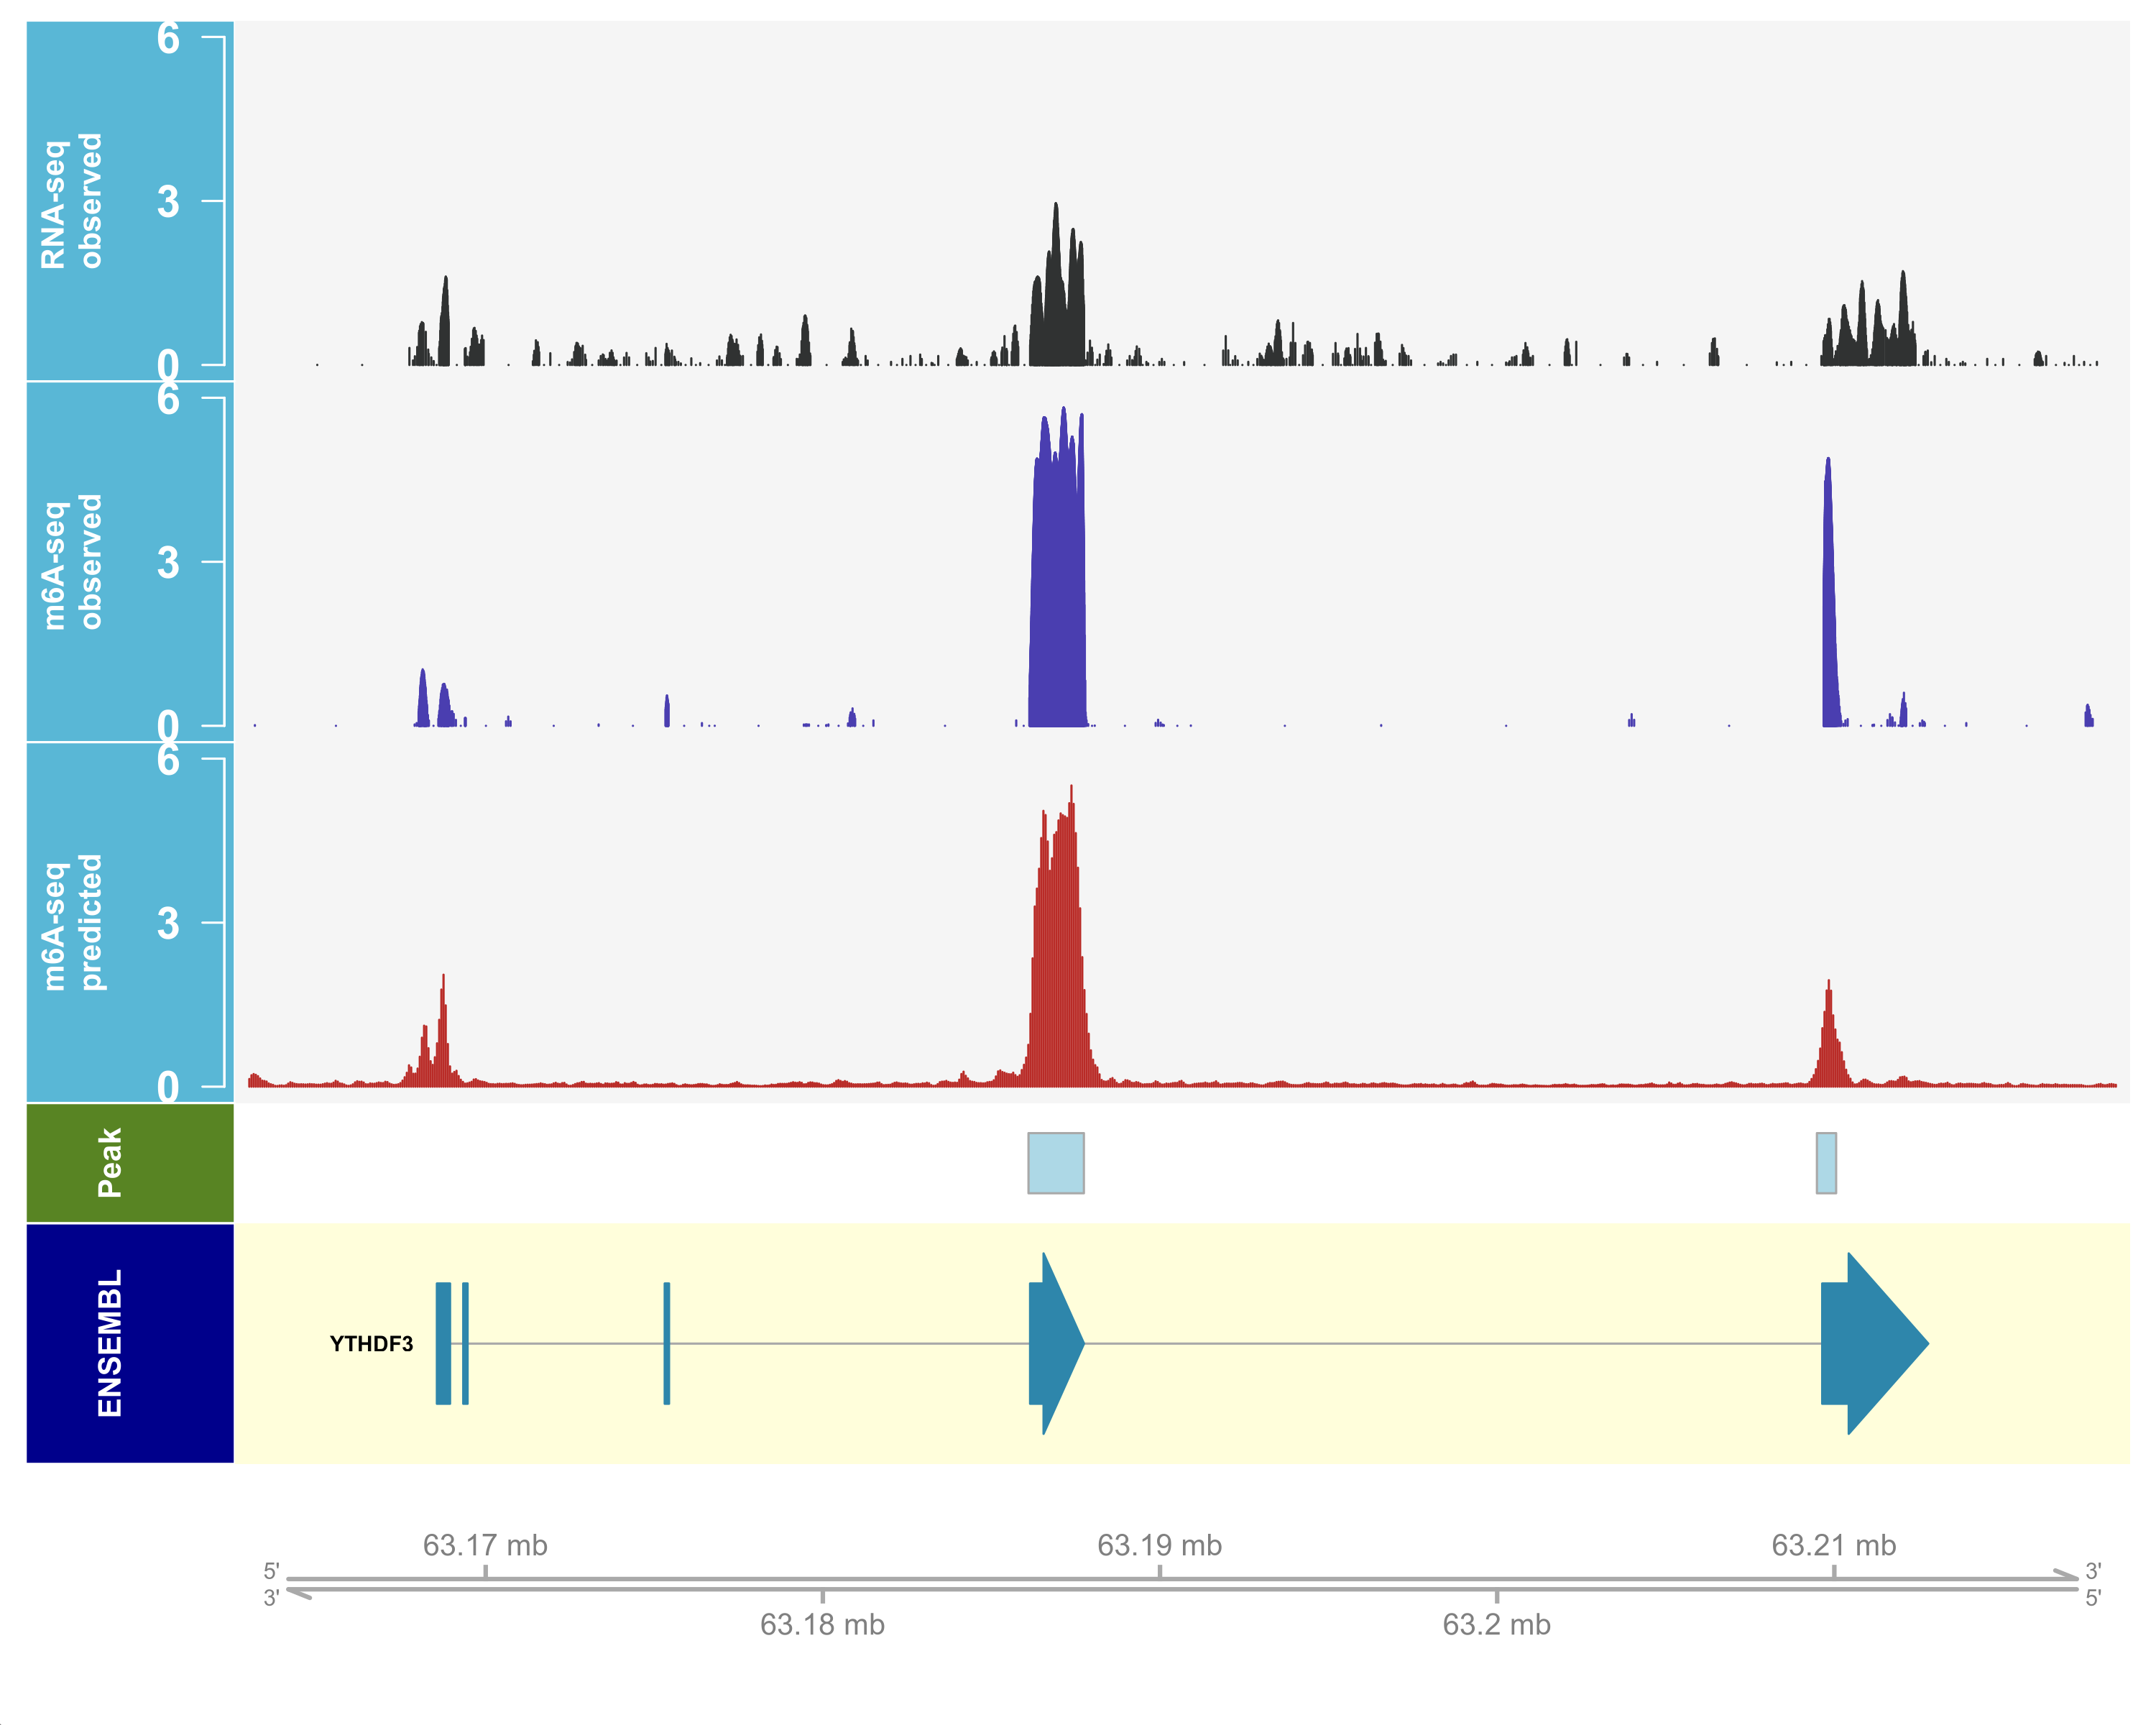

In [113]:
options(repr.plot.width=10, repr.plot.height=8, repr.plot.res = 300)
zoom <- 10000

sizes <- rep(x=0.15, times=length(bwtracks))
sizes <- c(sizes, 0.05, 0.1, 0.1)
plotTracks(
    full_tracks,
    sizes = sizes,
    from = start + zoom / 2,
    to = end - zoom / 2,
    main = "",
    cex.main = 1.5,
    fontface.main = 2,
    window = -1,
    windowSize = 100
)

In [115]:
# For masked model
mask1_bw <- file.path(pred_dir, paste0(sample, "_", gene, "_", "maskrbp.bigwig"))
mask2_bw <- file.path(pred_dir, paste0(sample, "_", gene, "_", "maskseq.bigwig"))
mask3_bw <- file.path(pred_dir, paste0(sample, "_", gene, "_", "maskrna.bigwig"))

mask_bw_file_list <- c(mask1_bw, mask2_bw, mask3_bw)
mask_track_colors <- c("#3b5998", "#3b5998", "#3b5998")
mask_log_flags <- c(FALSE, FALSE, FALSE)
mask_track_titles <- c("Mask RBP", "Mask Seq", "Mask RNA")

mask_bwtracks <- c()
i = 1
for (bwfile in mask_bw_file_list) {
    track <- get_bwtrack(
        bwfile, chrom, start, end, track_color=mask_track_colors[i],
        log_transform=mask_log_flags[i], panel_title=mask_track_titles[i],
                ylim=c(0,6),
        yTicksAt=c(0,3,6)
    )
    mask_bwtracks <- c(mask_bwtracks, track)
    i = i + 1
}

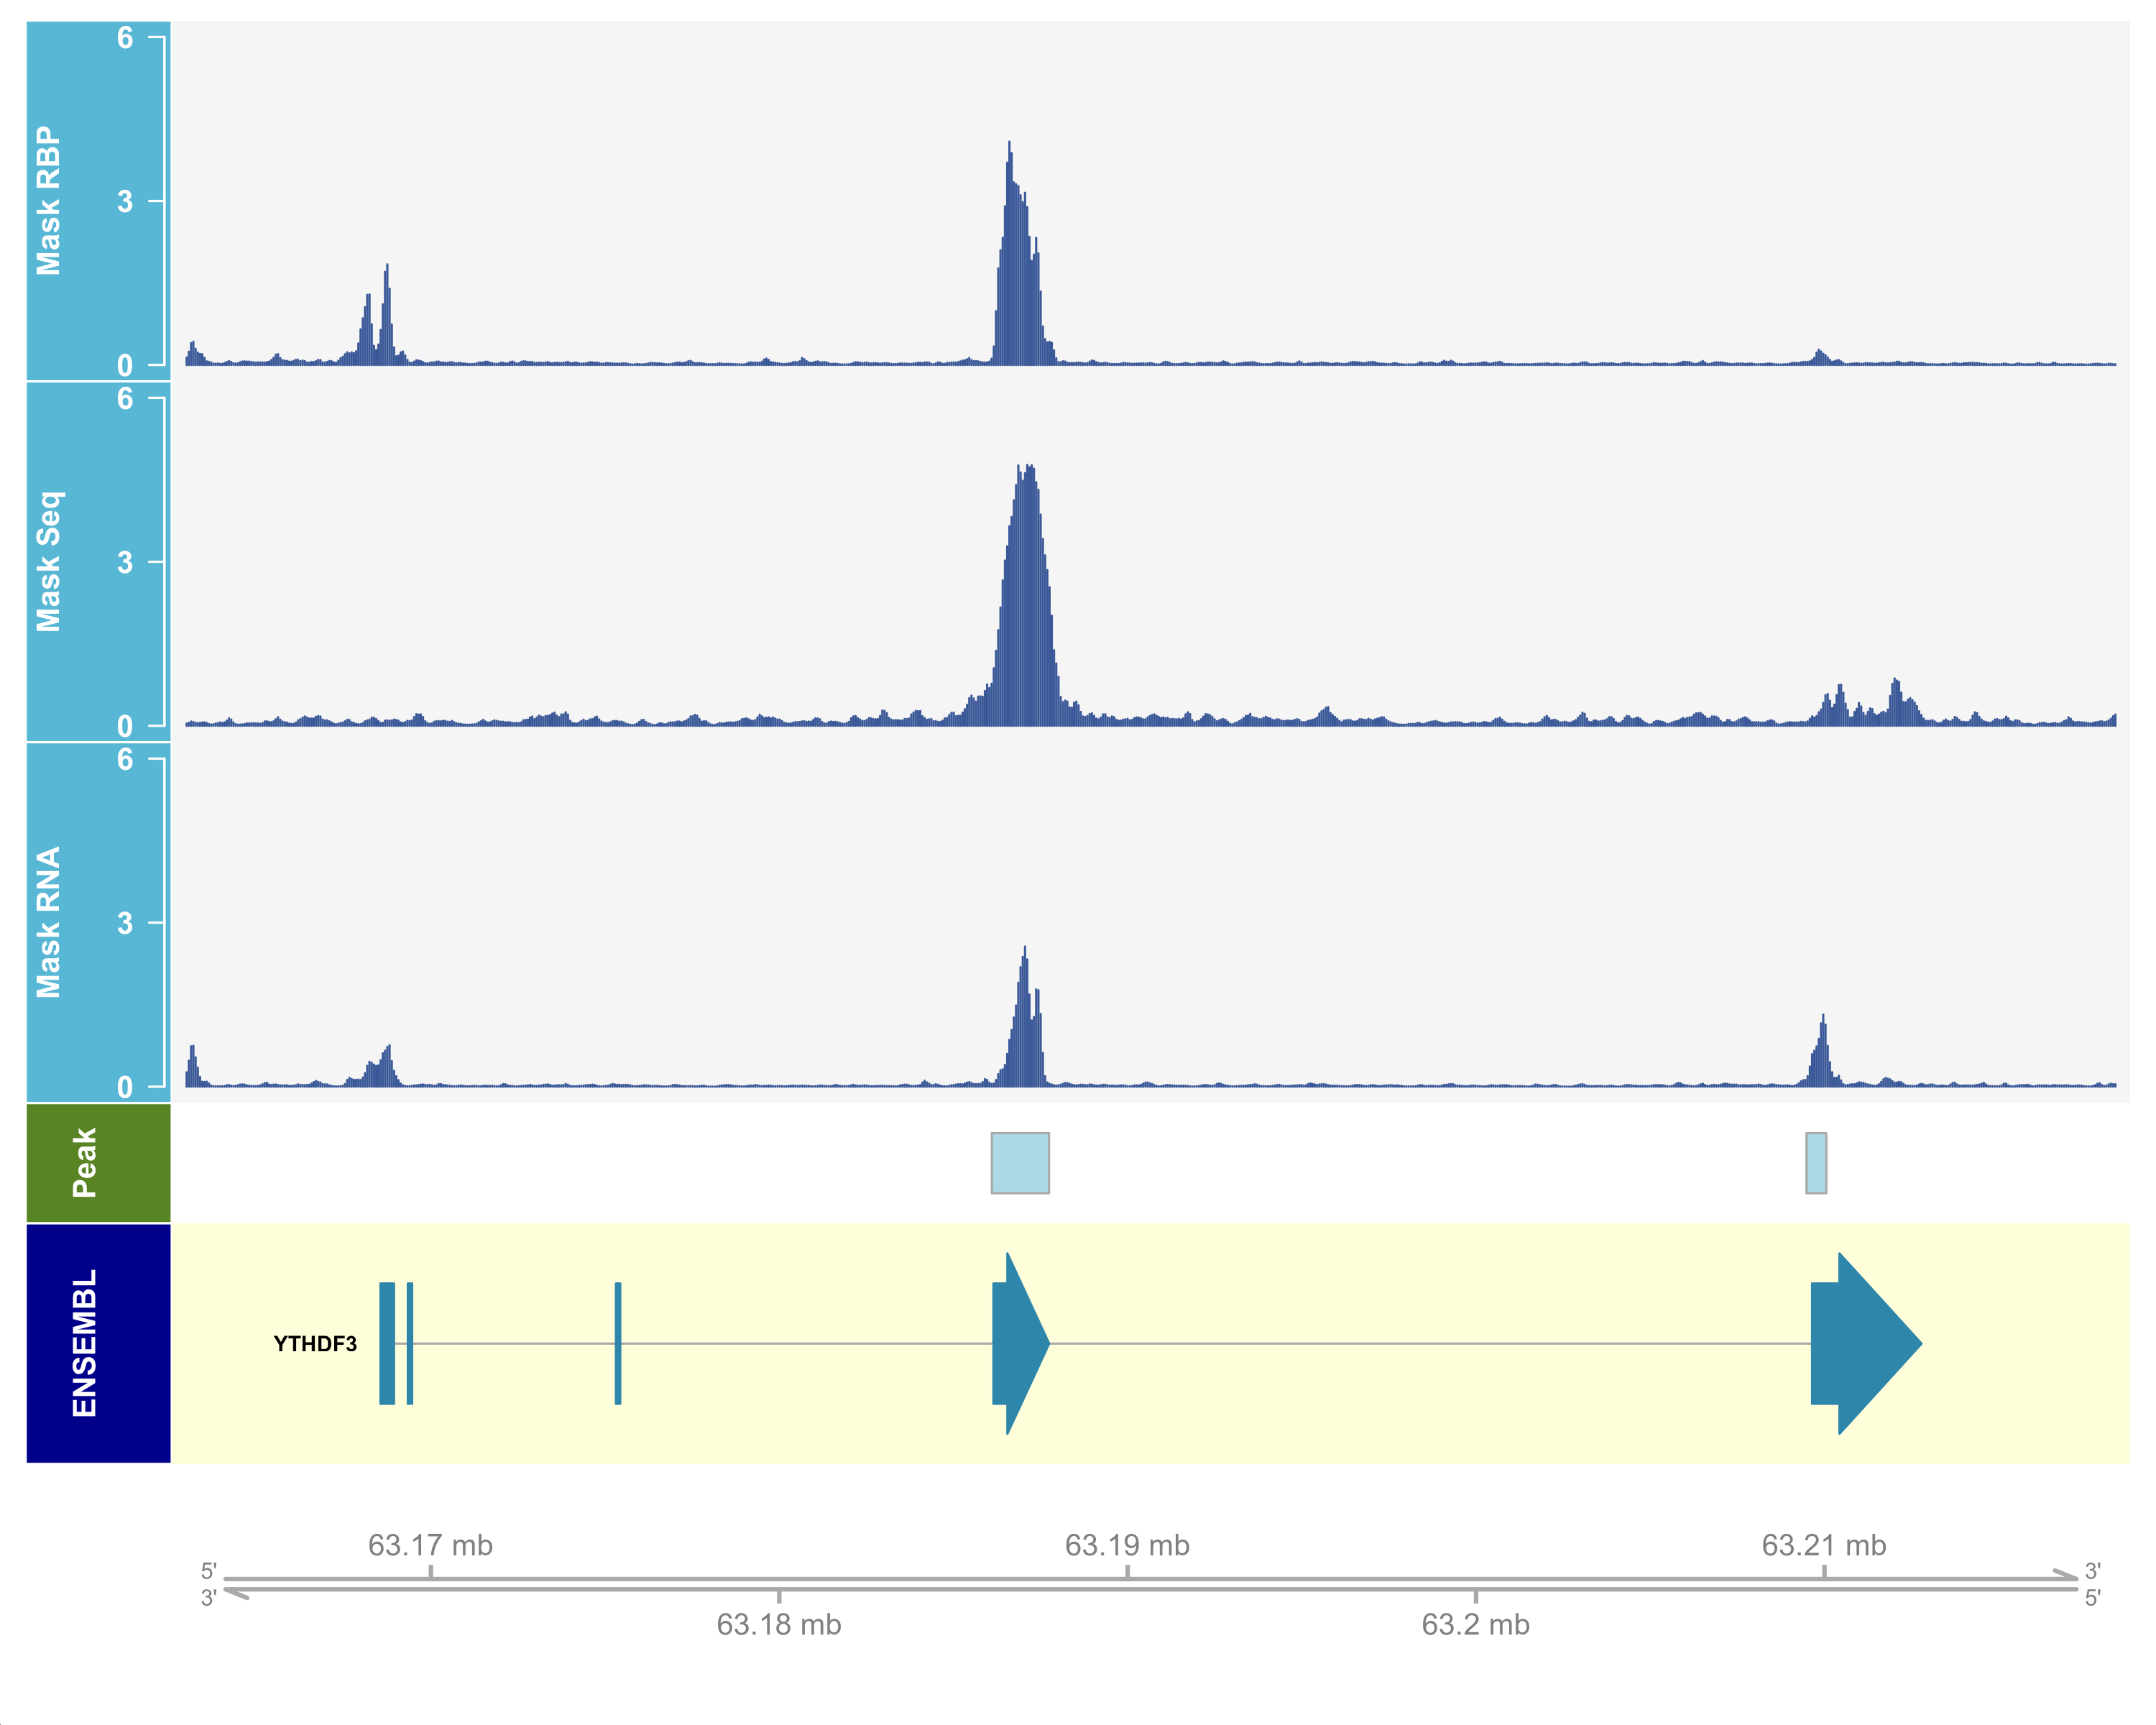

In [117]:
options(repr.plot.width=10, repr.plot.height=8, repr.plot.res = 300)
zoom <- 10000

sizes <- rep(x=0.15, times=length(mask_bwtracks))
plotTracks(
    c(mask_bwtracks, peak_track, grtrack, axis_track),
    sizes = c(sizes, 0.05, 0.1, 0.1),
    from = start + zoom / 2,
    to = end - zoom / 2,
    main = "",
    cex.main = 1.5,
    fontface.main = 2,
    window = -1,
    windowSize = 100
)

In [83]:
63157901-5000 + 65536

[1] 63218437